# Infant Cry Classification - Handling Class Imbalance with Synthetic Data
## Comprehensive comparison of oversampling techniques

## 1. Install Required Packages

In [ ]:
# Run this once to install imbalanced-learn
# !pip install imbalanced-learn pandas numpy scikit-learn matplotlib seaborn xgboost lightgbm

## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Imbalanced-learn for synthetic data generation
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 3. Load Data and Analyze Class Imbalance

In [2]:
# Load dataset - UPDATE THIS PATH
filepath = r'C:\Users\ADMIN\Downloads\Cry classification\donateacry-corpus_features_final.csv'
df = pd.read_csv(filepath)

print(f"Dataset Shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

Dataset Shape: (457, 27)

First few rows:


,Cry_Audio_File,Cry_Reason,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,del2MFCCs13,MelSpec,MFCCs20,MFCCs1,MFCCs2,MFCCs3,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
0,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.028202,0.011050,0.098990,0.102389,1264.335599,519.101121,26.821807,-48.271230,0.082188,-0.003010,-52.582010,-31.961296,-606.60547,93.934900,-47.782738,-15.073559,10.004257,-30.088297,-18.766724,8.679635,-2.352078,-7.746244,-3.096202,-4.715273,-3.918095
1,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.021071,0.006951,0.115383,0.050369,1268.608766,575.457549,25.881312,-49.861237,0.101375,0.018910,-55.122580,-32.500510,-628.12067,101.602480,-34.459390,-10.316871,-0.607061,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785
2,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.029967,0.010904,0.116663,0.100042,1546.578200,699.626649,26.594715,-49.541706,0.023605,0.020594,-50.736797,-31.240011,-585.09564,86.385560,-67.562416,-22.161522,2.070754,-26.675592,3.294869,7.788799,-21.903955,-5.744544,4.150358,-11.718720,-6.870083
3,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.027163,0.010520,0.085081,0.140766,1089.415328,668.895951,25.608310,-44.275997,-0.016075,0.030941,-47.155730,-29.790195,-538.09910,96.096985,-20.241573,-1.704598,0.226281,-29.814095,-14.937744,-11.162116,-21.503994,-7.501309,-7.856627,-15.119538,-3.970483
4,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.016663,0.006577,0.067108,0.057629,1017.610932,700.682410,28.196010,-51.325264,0.021112,0.012415,-54.007328,-32.031350,-611.44860,68.682050,-8.392762,7.812110,-9.098410,-34.050182,-9.673841,-11.780775,-24.962975,-7.697065,-9.014325,-15.366213,-2.237437


In [3]:
# Analyze class distribution
print("="*80)
print("CLASS DISTRIBUTION ANALYSIS")
print("="*80)

class_counts = df['Cry_Reason'].value_counts()
print("\nAbsolute Counts:")
print(class_counts)

print("\nPercentage Distribution:")
class_percentages = (class_counts / len(df) * 100).round(2)
for cls, pct in class_percentages.items():
    print(f"  {cls}: {pct}%")

# Calculate imbalance ratio
max_count = class_counts.max()
min_count = class_counts.min()
imbalance_ratio = max_count / min_count

print(f"\n⚠️ Imbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"   (Majority class has {imbalance_ratio:.2f}x more samples than minority class)")

if imbalance_ratio > 1.5:
    print("\n🔴 Significant class imbalance detected! Synthetic data generation recommended.")
else:
    print("\n🟢 Classes are relatively balanced.")

CLASS DISTRIBUTION ANALYSIS

Absolute Counts:
Cry_Reason
3    382
2     27
4     24
0     16
1      8
Name: count, dtype: int64

Percentage Distribution:
  3: 83.59%
  2: 5.91%
  4: 5.25%
  0: 3.5%
  1: 1.75%

⚠️ Imbalance Ratio: 47.75:1
   (Majority class has 47.75x more samples than minority class)

🔴 Significant class imbalance detected! Synthetic data generation recommended.


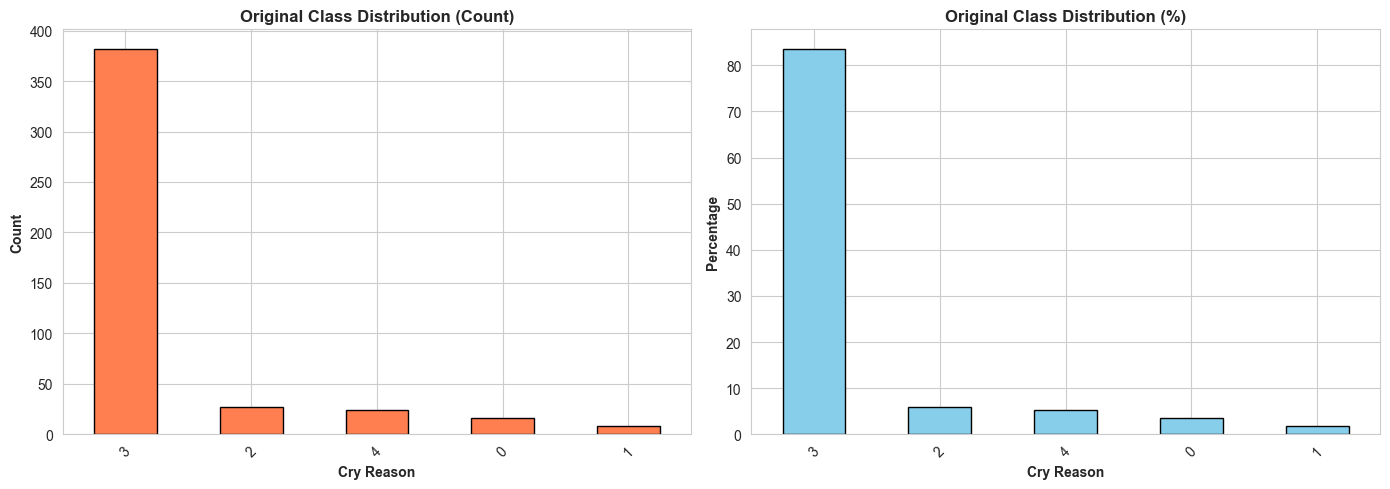

In [4]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
class_counts.plot(kind='bar', ax=axes[0], color='coral', edgecolor='black')
axes[0].set_title('Original Class Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cry Reason', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Percentage plot
class_percentages.plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('Original Class Distribution (%)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cry Reason', fontweight='bold')
axes[1].set_ylabel('Percentage', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. Prepare Data

In [5]:
# Drop audio file column
if 'Cry_Audio_File' in df.columns:
    df_clean = df.drop('Cry_Audio_File', axis=1)
else:
    df_clean = df.copy()

# Separate features and target
X = df_clean.drop('Cry_Reason', axis=1)
y = df_clean['Cry_Reason']

print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")

Features: 25
Samples: 457


In [6]:
# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Label Encoding:")
for label, encoded in zip(le.classes_, le.transform(le.classes_)):
    print(f"  {label} → {encoded}")

Label Encoding:
  0 → 0
  1 → 1
  2 → 2
  3 → 3
  4 → 4


In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

print("\nTraining set distribution:")
train_dist = Counter(y_train)
for label, count in sorted(train_dist.items()):
    print(f"  Class {label} ({le.classes_[label]}): {count} samples")

Training set: 365 samples
Testing set: 92 samples

Training set distribution:
  Class 0 (0): 13 samples
  Class 1 (1): 6 samples
  Class 2 (2): 22 samples
  Class 3 (3): 305 samples
  Class 4 (4): 19 samples


In [8]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")

✅ Features scaled using StandardScaler


## 5. Apply Different Synthetic Data Generation Techniques

In [9]:
# Dictionary to store resampled datasets
sampling_techniques = {}

print("="*80)
print("APPLYING SYNTHETIC DATA GENERATION TECHNIQUES")
print("="*80)

APPLYING SYNTHETIC DATA GENERATION TECHNIQUES


In [10]:
# 1. SMOTE (Synthetic Minority Over-sampling TEchnique)
print("\n1️⃣ SMOTE - Synthetic Minority Over-sampling TEchnique")
print("   Creates synthetic samples by interpolating between minority class samples")

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)
sampling_techniques['SMOTE'] = (X_smote, y_smote)

print(f"   ✅ New shape: {X_smote.shape}")
print(f"   Distribution: {Counter(y_smote)}")


1️⃣ SMOTE - Synthetic Minority Over-sampling TEchnique
   Creates synthetic samples by interpolating between minority class samples
   ✅ New shape: (1525, 25)
   Distribution: Counter({np.int64(2): 305, np.int64(3): 305, np.int64(4): 305, np.int64(0): 305, np.int64(1): 305})


In [11]:
# 2. ADASYN (Adaptive Synthetic Sampling)
print("\n2️⃣ ADASYN - Adaptive Synthetic Sampling")
print("   Focuses on generating samples in harder-to-learn regions")

try:
    adasyn = ADASYN(random_state=42)
    X_adasyn, y_adasyn = adasyn.fit_resample(X_train_scaled, y_train)
    sampling_techniques['ADASYN'] = (X_adasyn, y_adasyn)
    print(f"   ✅ New shape: {X_adasyn.shape}")
    print(f"   Distribution: {Counter(y_adasyn)}")
except Exception as e:
    print(f"   ⚠️ ADASYN failed: {e}")


2️⃣ ADASYN - Adaptive Synthetic Sampling
   Focuses on generating samples in harder-to-learn regions
   ✅ New shape: (1521, 25)
   Distribution: Counter({np.int64(1): 307, np.int64(3): 305, np.int64(4): 305, np.int64(2): 304, np.int64(0): 300})


In [12]:
# 3. Borderline SMOTE
print("\n3️⃣ Borderline SMOTE")
print("   Focuses on samples near the decision boundary")

borderline_smote = BorderlineSMOTE(random_state=42)
X_borderline, y_borderline = borderline_smote.fit_resample(X_train_scaled, y_train)
sampling_techniques['Borderline-SMOTE'] = (X_borderline, y_borderline)

print(f"   ✅ New shape: {X_borderline.shape}")
print(f"   Distribution: {Counter(y_borderline)}")


3️⃣ Borderline SMOTE
   Focuses on samples near the decision boundary
   ✅ New shape: (1525, 25)
   Distribution: Counter({np.int64(2): 305, np.int64(3): 305, np.int64(4): 305, np.int64(0): 305, np.int64(1): 305})


In [13]:
# 4. SVM SMOTE
print("\n4️⃣ SVM SMOTE")
print("   Uses SVM to find support vectors for synthetic sample generation")

try:
    svm_smote = SVMSMOTE(random_state=42)
    X_svm, y_svm = svm_smote.fit_resample(X_train_scaled, y_train)
    sampling_techniques['SVM-SMOTE'] = (X_svm, y_svm)
    print(f"   ✅ New shape: {X_svm.shape}")
    print(f"   Distribution: {Counter(y_svm)}")
except Exception as e:
    print(f"   ⚠️ SVM-SMOTE failed: {e}")


4️⃣ SVM SMOTE
   Uses SVM to find support vectors for synthetic sample generation
   ✅ New shape: (953, 25)
   Distribution: Counter({np.int64(3): 305, np.int64(2): 180, np.int64(0): 174, np.int64(1): 155, np.int64(4): 139})


In [14]:
# 5. Random Over Sampling
print("\n5️⃣ Random Over Sampling")
print("   Randomly duplicates minority class samples")

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train_scaled, y_train)
sampling_techniques['Random-OverSampling'] = (X_ros, y_ros)

print(f"   ✅ New shape: {X_ros.shape}")
print(f"   Distribution: {Counter(y_ros)}")


5️⃣ Random Over Sampling
   Randomly duplicates minority class samples
   ✅ New shape: (1525, 25)
   Distribution: Counter({np.int64(2): 305, np.int64(3): 305, np.int64(4): 305, np.int64(0): 305, np.int64(1): 305})


In [15]:
# 6. SMOTE + Tomek Links
print("\n6️⃣ SMOTE + Tomek Links (Hybrid)")
print("   Applies SMOTE then removes Tomek links (overlapping samples)")

smote_tomek = SMOTETomek(random_state=42)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X_train_scaled, y_train)
sampling_techniques['SMOTE-Tomek'] = (X_smote_tomek, y_smote_tomek)

print(f"   ✅ New shape: {X_smote_tomek.shape}")
print(f"   Distribution: {Counter(y_smote_tomek)}")


6️⃣ SMOTE + Tomek Links (Hybrid)
   Applies SMOTE then removes Tomek links (overlapping samples)
   ✅ New shape: (1525, 25)
   Distribution: Counter({np.int64(2): 305, np.int64(3): 305, np.int64(4): 305, np.int64(0): 305, np.int64(1): 305})


In [16]:
# 7. SMOTE + ENN
print("\n7️⃣ SMOTE + ENN (Hybrid)")
print("   Applies SMOTE then removes samples using Edited Nearest Neighbors")

smote_enn = SMOTEENN(random_state=42)
X_smote_enn, y_smote_enn = smote_enn.fit_resample(X_train_scaled, y_train)
sampling_techniques['SMOTE-ENN'] = (X_smote_enn, y_smote_enn)

print(f"   ✅ New shape: {X_smote_enn.shape}")
print(f"   Distribution: {Counter(y_smote_enn)}")


7️⃣ SMOTE + ENN (Hybrid)
   Applies SMOTE then removes samples using Edited Nearest Neighbors
   ✅ New shape: (1280, 25)
   Distribution: Counter({np.int64(1): 305, np.int64(4): 303, np.int64(2): 302, np.int64(0): 299, np.int64(3): 71})


In [17]:
# Add original for comparison
sampling_techniques['Original (No Sampling)'] = (X_train_scaled, y_train)

print("\n" + "="*80)
print(f"✅ Total techniques applied: {len(sampling_techniques)}")
print("="*80)


✅ Total techniques applied: 8


## 6. Visualize Sampling Techniques

In [ ]:
# Visualize all sampling techniques
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, (name, data) in enumerate(sampling_techniques.items()):
    if data is None:
        axes[idx].text(0.5, 0.5, f'{name}\nFailed', ha='center', va='center')
        axes[idx].set_xticks([])
        axes[idx].set_yticks([])
        continue
    
    X_resampled, y_resampled = data
    class_counts = Counter(y_resampled)
    classes = sorted(class_counts.keys())
    counts = [class_counts[c] for c in classes]
    
    axes[idx].bar(classes, counts, color='lightgreen', edgecolor='black')
    axes[idx].set_title(f'{name}\n(Total: {len(y_resampled)} samples)', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Class')
    axes[idx].set_ylabel('Count')
    axes[idx].set_xticks(classes)
    axes[idx].set_xticklabels([le.classes_[c] for c in classes], rotation=45, ha='right', fontsize=8)

# Hide extra subplots
for idx in range(len(sampling_techniques), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 7. Train Models with Each Sampling Technique

In [18]:
# Define models to test
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(n_estimators=100, random_state=42, verbose=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

print(f"Testing {len(models)} models with {len(sampling_techniques)} sampling techniques")
print(f"Total combinations: {len(models) * len(sampling_techniques)}")

Testing 4 models with 8 sampling techniques
Total combinations: 32


In [19]:
# Train and evaluate all combinations
results = {}

for sampling_name, data in sampling_techniques.items():
    if data is None:
        continue
    
    X_train_resampled, y_train_resampled = data
    
    print(f"\n{'='*70}")
    print(f"Testing: {sampling_name}")
    print(f"Training samples: {X_train_resampled.shape[0]}")
    print(f"{'='*70}")
    
    sampling_results = {}
    
    for model_name, model in models.items():
        # Train
        model.fit(X_train_resampled, y_train_resampled)
        
        # Predict
        y_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        sampling_results[model_name] = {
            'accuracy': accuracy,
            'f1_score': f1,
            'predictions': y_pred
        }
        
        print(f"  {model_name:20s} → Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")
    
    results[sampling_name] = sampling_results

print("\n✅ All models trained!")


Testing: SMOTE
Training samples: 1525
  Random Forest        → Accuracy: 0.7826, F1-Score: 0.7826
  XGBoost              → Accuracy: 0.8478, F1-Score: 0.8307
  LightGBM             → Accuracy: 0.7935, F1-Score: 0.7899
  Gradient Boosting    → Accuracy: 0.7174, F1-Score: 0.7258

Testing: ADASYN
Training samples: 1521
  Random Forest        → Accuracy: 0.7826, F1-Score: 0.7789
  XGBoost              → Accuracy: 0.7826, F1-Score: 0.7802
  LightGBM             → Accuracy: 0.7826, F1-Score: 0.7845
  Gradient Boosting    → Accuracy: 0.7826, F1-Score: 0.7941

Testing: Borderline-SMOTE
Training samples: 1525
  Random Forest        → Accuracy: 0.7935, F1-Score: 0.7778
  XGBoost              → Accuracy: 0.7935, F1-Score: 0.7713
  LightGBM             → Accuracy: 0.7935, F1-Score: 0.7663
  Gradient Boosting    → Accuracy: 0.7500, F1-Score: 0.7464

Testing: SVM-SMOTE
Training samples: 953
  Random Forest        → Accuracy: 0.7935, F1-Score: 0.7633
  XGBoost              → Accuracy: 0.7935, F1-Sco

## 8. Comprehensive Comparison

In [20]:
# Create comparison dataframe
comparison_data = []

for sampling_name, models_dict in results.items():
    for model_name, metrics in models_dict.items():
        comparison_data.append({
            'Sampling Technique': sampling_name,
            'Model': model_name,
            'Accuracy': metrics['accuracy'],
            'F1-Score': metrics['f1_score']
        })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values(['F1-Score', 'Accuracy'], ascending=False)

print("\n" + "="*100)
print("COMPREHENSIVE RESULTS (Sorted by F1-Score)")
print("="*100)
display(comparison_df.style.background_gradient(cmap='Greens', subset=['Accuracy', 'F1-Score']))


COMPREHENSIVE RESULTS (Sorted by F1-Score)


,Sampling Technique,Model,Accuracy,F1-Score
1,SMOTE,XGBoost,0.847826,0.830698
21,SMOTE-Tomek,XGBoost,0.847826,0.830698
7,ADASYN,Gradient Boosting,0.782609,0.794059
2,SMOTE,LightGBM,0.793478,0.789925
22,SMOTE-Tomek,LightGBM,0.793478,0.789925
6,ADASYN,LightGBM,0.782609,0.784499
0,SMOTE,Random Forest,0.782609,0.782609
20,SMOTE-Tomek,Random Forest,0.782609,0.782609
5,ADASYN,XGBoost,0.782609,0.780193
4,ADASYN,Random Forest,0.782609,0.778852


In [21]:
# Find best combination
best_row = comparison_df.iloc[0]

print("\n" + "="*80)
print("🏆 BEST COMBINATION")
print("="*80)
print(f"Sampling Technique: {best_row['Sampling Technique']}")
print(f"Model: {best_row['Model']}")
print(f"Accuracy: {best_row['Accuracy']:.4f}")
print(f"F1-Score: {best_row['F1-Score']:.4f}")

# Improvement over original
original_best = comparison_df[comparison_df['Sampling Technique'] == 'Original (No Sampling)'].iloc[0]
improvement = ((best_row['F1-Score'] - original_best['F1-Score']) / original_best['F1-Score']) * 100

print(f"\n📈 Improvement over original: {improvement:+.2f}%")


🏆 BEST COMBINATION
Sampling Technique: SMOTE
Model: XGBoost
Accuracy: 0.8478
F1-Score: 0.8307

📈 Improvement over original: +8.92%


## 9. Visualize Final Results

In [ ]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Top 10 combinations
top_10 = comparison_df.head(10)
axes[0, 0].barh(range(len(top_10)), top_10['F1-Score'], color='lightblue', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_10)))
axes[0, 0].set_yticklabels([f"{row['Sampling Technique']}\n{row['Model']}" for _, row in top_10.iterrows()], fontsize=8)
axes[0, 0].set_xlabel('F1-Score', fontweight='bold')
axes[0, 0].set_title('Top 10 Combinations (by F1-Score)', fontsize=12, fontweight='bold')
axes[0, 0].invert_yaxis()
for i, v in enumerate(top_10['F1-Score']):
    axes[0, 0].text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=8)

# Plot 2: Average by sampling technique
avg_by_sampling = comparison_df.groupby('Sampling Technique')[['Accuracy', 'F1-Score']].mean().sort_values('F1-Score', ascending=False)
avg_by_sampling.plot(kind='barh', ax=axes[0, 1], color=['skyblue', 'lightcoral'], edgecolor='black')
axes[0, 1].set_xlabel('Score', fontweight='bold')
axes[0, 1].set_title('Average Performance by Sampling Technique', fontsize=12, fontweight='bold')
axes[0, 1].legend(['Accuracy', 'F1-Score'])

# Plot 3: Average by model
avg_by_model = comparison_df.groupby('Model')[['Accuracy', 'F1-Score']].mean().sort_values('F1-Score', ascending=False)
avg_by_model.plot(kind='bar', ax=axes[1, 0], color=['lightgreen', 'orange'], edgecolor='black')
axes[1, 0].set_xlabel('Model', fontweight='bold')
axes[1, 0].set_ylabel('Score', fontweight='bold')
axes[1, 0].set_title('Average Performance by Model', fontsize=12, fontweight='bold')
axes[1, 0].legend(['Accuracy', 'F1-Score'])
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Heatmap
pivot_table = comparison_df.pivot(index='Sampling Technique', columns='Model', values='F1-Score')
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='YlGnBu', ax=axes[1, 1], cbar_kws={'label': 'F1-Score'})
axes[1, 1].set_title('F1-Score Heatmap', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Model', fontweight='bold')
axes[1, 1].set_ylabel('Sampling Technique', fontweight='bold')

plt.tight_layout()
plt.show()

## 10. Detailed Analysis of Best Model

In [22]:
# Get best model predictions
best_sampling = best_row['Sampling Technique']
best_model = best_row['Model']
best_predictions = results[best_sampling][best_model]['predictions']

print(f"Classification Report for Best Combination:")
print(f"Sampling: {best_sampling}")
print(f"Model: {best_model}")
print("\n" + "="*80)
print(classification_report(y_test, best_predictions, target_names=le.classes_))

Classification Report for Best Combination:
Sampling: SMOTE
Model: XGBoost



TypeError: object of type 'numpy.int64' has no len()

In [ ]:
# Confusion matrix for best model
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix\n{best_sampling} + {best_model}', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.show()

## 11. Export Results

In [ ]:
# Save comparison results
comparison_df.to_csv('sampling_comparison_results.csv', index=False)
print("✅ Results saved to: sampling_comparison_results.csv")

# Save summary
summary = {
    'Best Sampling Technique': best_sampling,
    'Best Model': best_model,
    'Best Accuracy': best_row['Accuracy'],
    'Best F1-Score': best_row['F1-Score'],
    'Improvement over Original': f"{improvement:+.2f}%"
}

summary_df = pd.DataFrame([summary])
summary_df.to_csv('best_combination_summary.csv', index=False)
print("✅ Summary saved to: best_combination_summary.csv")

## 12. Summary & Recommendations

In [23]:
print("\n" + "="*80)
print("FINAL SUMMARY & RECOMMENDATIONS")
print("="*80)

print(f"\n✅ Tested {len(sampling_techniques)} sampling techniques")
print(f"✅ Tested {len(models)} machine learning models")
print(f"✅ Total combinations evaluated: {len(comparison_df)}")

print(f"\n🏆 Best Configuration:")
print(f"   Sampling: {best_sampling}")
print(f"   Model: {best_model}")
print(f"   Accuracy: {best_row['Accuracy']:.4f}")
print(f"   F1-Score: {best_row['F1-Score']:.4f}")
print(f"   Improvement: {improvement:+.2f}%")

print(f"\n📊 Top 3 Sampling Techniques:")
top_sampling = avg_by_sampling.head(3)
for i, (name, row) in enumerate(top_sampling.iterrows(), 1):
    print(f"   {i}. {name}: F1={row['F1-Score']:.4f}")

print(f"\n🤖 Top 3 Models:")
top_models = avg_by_model.head(3)
for i, (name, row) in enumerate(top_models.iterrows(), 1):
    print(f"   {i}. {name}: F1={row['F1-Score']:.4f}")

print("\n💡 Recommendations:")
print("   1. Use the best combination for production")
print("   2. Consider hyperparameter tuning for further improvement")
print("   3. Monitor performance on new data")
print("   4. Consider ensemble methods combining top performers")
print("\n✅ Analysis complete!")


FINAL SUMMARY & RECOMMENDATIONS

✅ Tested 8 sampling techniques
✅ Tested 4 machine learning models
✅ Total combinations evaluated: 32

🏆 Best Configuration:
   Sampling: SMOTE
   Model: XGBoost
   Accuracy: 0.8478
   F1-Score: 0.8307
   Improvement: +8.92%

📊 Top 3 Sampling Techniques:


NameError: name 'avg_by_sampling' is not defined